# Creating a Function and a Loop

**Author:** Elise Chessman

In this notebook, I'll use a function and a loop to create maps from my historic mine data for the top 10 mine types, the top 10 counties, and the date that the topo map was from.

## Function and a loop by mine type


In [1]:
# First I'll bring in the usual libraries 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

In [2]:
#Now I'll bring in my cleaned up historic mine data
hist_gdf = gpd.read_file("historic_mines.geojson")
hist_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE       5474 non-null   object  
 1   COUNTY      5474 non-null   object  
 2   FTR_TYPE    5474 non-null   object  
 3   FTR_NAME    667 non-null    object  
 4   FTR_AZIMUT  5474 non-null   float64 
 5   TOPO_NAME   5474 non-null   object  
 6   TOPO_DATE   5474 non-null   int64   
 7   TOPO_SCALE  5474 non-null   object  
 8   COMPILEDBY  5474 non-null   object  
 9   REMARKS     211 non-null    object  
 10  GDA_ID      5474 non-null   float64 
 11  SCANID      5474 non-null   float64 
 12  geometry    5474 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 556.1+ KB


In [3]:
hist_gdf.FTR_TYPE.value_counts()

Mine Shaft                 3980
Open Pit Mine               584
Quarry                      541
Open Pit Mine or Quarry     195
Mine                        131
Strip Mine                   20
Placer Mine                  13
Coal Mine                     6
Quarry - Rock                 2
Uranium Mine                  2
Name: FTR_TYPE, dtype: int64

In [4]:
# get the top 50 mines types into a list
top_10_mines = hist_gdf.FTR_TYPE.value_counts().head(10).index.tolist()
top_10_mines

['Mine Shaft',
 'Open Pit Mine',
 'Quarry',
 'Open Pit Mine or Quarry',
 'Mine',
 'Strip Mine',
 'Placer Mine',
 'Coal Mine',
 'Quarry - Rock',
 'Uranium Mine']

In [5]:
hist_gdf[hist_gdf.FTR_TYPE == 'Mine'].head()

,STATE,COUNTY,FTR_TYPE,FTR_NAME,FTR_AZIMUT,TOPO_NAME,TOPO_DATE,TOPO_SCALE,COMPILEDBY,REMARKS,GDA_ID,SCANID,geometry
5,CO,Teller,Mine,Joe Dandy Mine,0.0,Cripple Creek South,1951,24000,USGS,Label without symbol. Point placed on building...,5348551.0,400739.0,POINT (-105.14895 38.73032)
6,CO,Teller,Mine,Stratton Independence Mine,0.0,Cripple Creek South,1951,24000,USGS,Label without symbol. Point placed at center o...,5348551.0,400739.0,POINT (-105.13510 38.71177)
7,CO,Summit,Mine,Wellington Mine,0.0,Breckenridge,1970,24000,USGS,Label without symbol. Point placed at center o...,5347215.0,400230.0,POINT (-106.01635 39.48332)
8,CO,Teller,Mine,Chicken Hawk Mine,0.0,Cripple Creek South,1951,24000,USGS,Label without symbol. Point placed at center o...,5348551.0,400739.0,POINT (-105.16316 38.72706)
9,CO,Broomfield,Mine,Monarch Mine,0.0,Lafayette,1956,24000,USGS,Label without symbol. Point placed on building...,5352077.0,401099.0,POINT (-105.12481 39.93932)


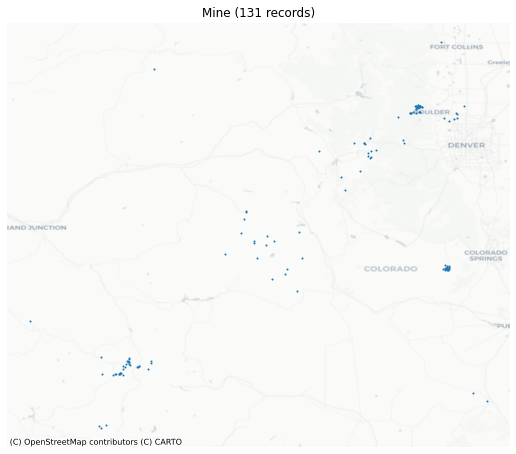

In [6]:
# mine variable
FTR_TYPE = 'Mine'

# map
ax = hist_gdf[hist_gdf.FTR_TYPE == FTR_TYPE].plot(figsize=(9,9), markersize=1)

# title (including count)
ax.set_title(FTR_TYPE + ' (' + str(hist_gdf[hist_gdf.FTR_TYPE == FTR_TYPE].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [7]:
# create a function
def FTR_TYPE_by(FTR_TYPE='Mines'):
    
    # map
    ax = hist_gdf[hist_gdf.FTR_TYPE == FTR_TYPE].plot(figsize=(9,9), markersize=2)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(FTR_TYPE + ' (' + str(hist_gdf[hist_gdf.FTR_TYPE == FTR_TYPE].shape[0]) + ' records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

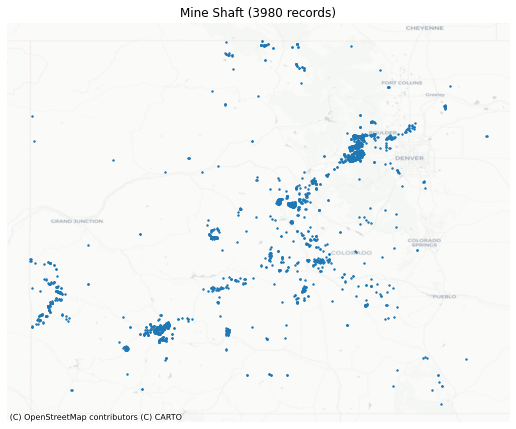

In [8]:
# call the function for a different mine type
FTR_TYPE_by(FTR_TYPE = 'Mine Shaft')

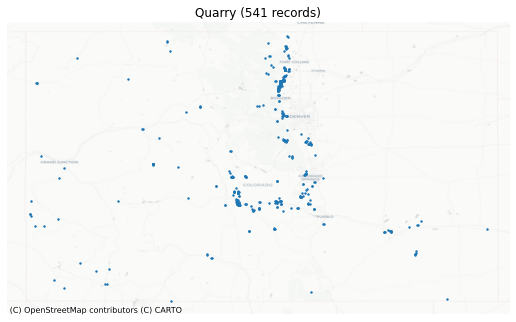

In [9]:
FTR_TYPE_by(FTR_TYPE = 'Quarry')

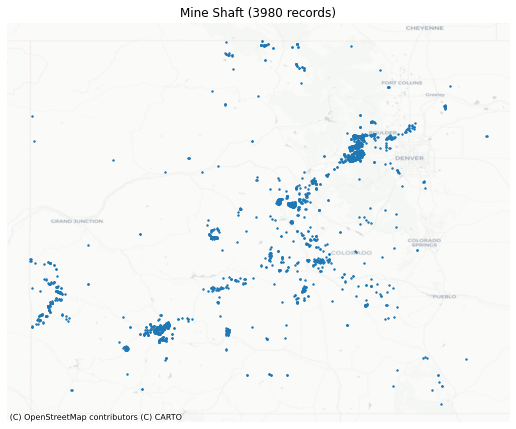

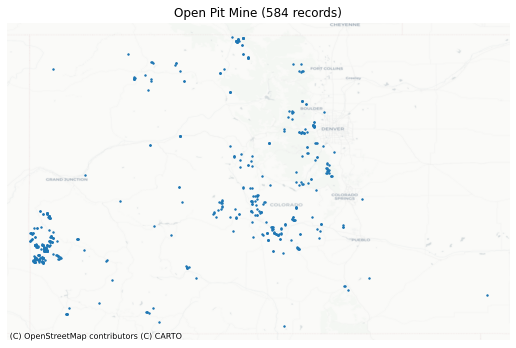

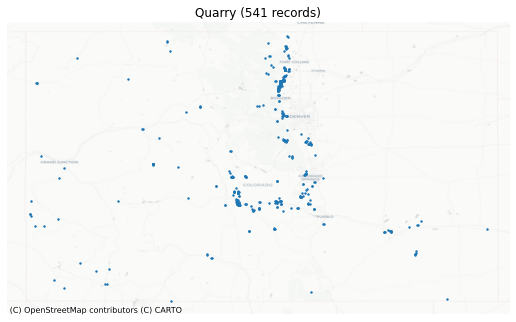

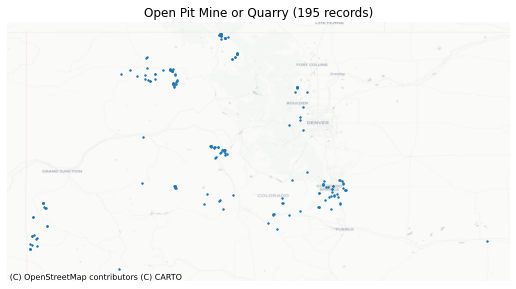

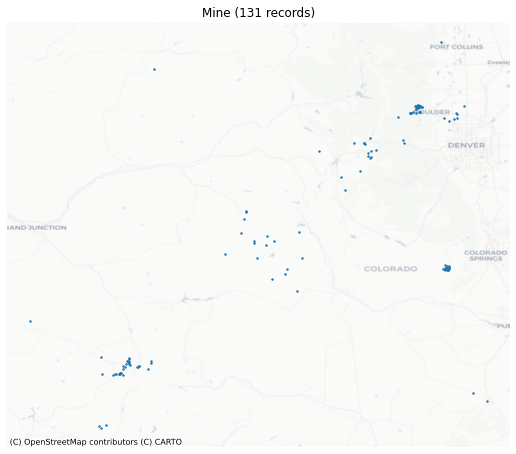

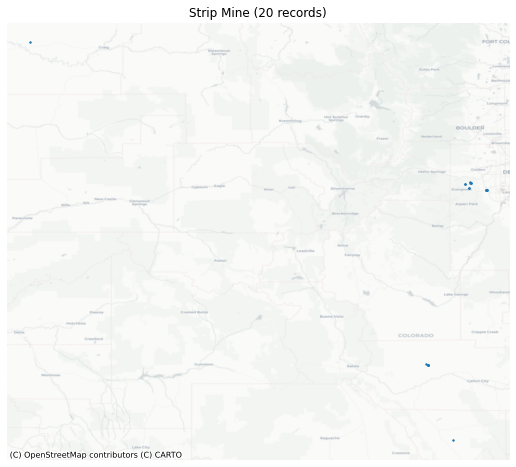

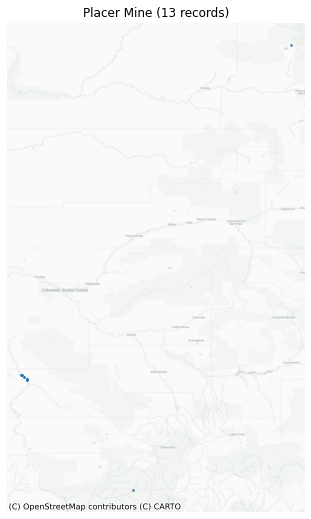

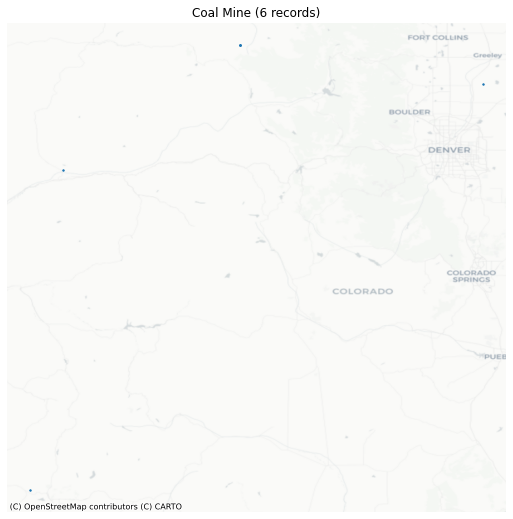

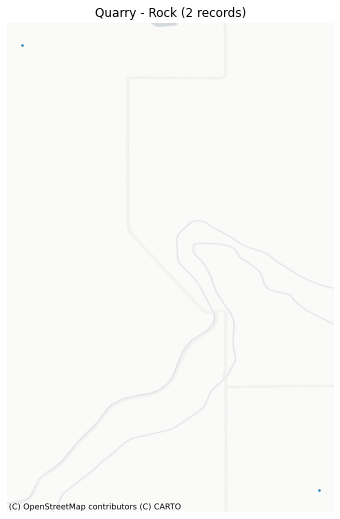

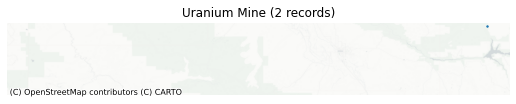

In [10]:
# loop through top 10 mine types
for FTR_TYPE in top_10_mines:
    FTR_TYPE_by(FTR_TYPE = FTR_TYPE)

## Function and a loop by counties

I'm going to use the function and loop to now create a variable for all mines focusing on specific counties. I'll start by looking at the top 10 counties for historic mines. 

I'll start with La Plata and San Juan as these are the counties that I isolated as my donut and my diamond in the Spatial Autocorrelation analysis.

In [11]:
hist_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE       5474 non-null   object  
 1   COUNTY      5474 non-null   object  
 2   FTR_TYPE    5474 non-null   object  
 3   FTR_NAME    667 non-null    object  
 4   FTR_AZIMUT  5474 non-null   float64 
 5   TOPO_NAME   5474 non-null   object  
 6   TOPO_DATE   5474 non-null   int64   
 7   TOPO_SCALE  5474 non-null   object  
 8   COMPILEDBY  5474 non-null   object  
 9   REMARKS     211 non-null    object  
 10  GDA_ID      5474 non-null   float64 
 11  SCANID      5474 non-null   float64 
 12  geometry    5474 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 556.1+ KB


In [12]:
hist_gdf.COUNTY.value_counts()

Gilpin         1087
Clear Creek     555
Lake            547
Boulder         410
Gunnison        278
San Miguel      258
San Juan        257
Chaffee         240
Fremont         210
Montrose        201
Jackson         142
Ouray           134
Larimer         129
Jefferson       114
Park            100
Saguache         98
Mineral          67
Summit           65
Routt            65
El Paso          55
Mesa             51
Douglas          45
Eagle            40
Custer           34
Weld             33
Teller           32
Dolores          30
Moffat           26
Hinsdale         24
La Plata         17
Pitkin           15
Montezuma        13
Pueblo           13
Huerfano         11
Bent             11
Garfield         11
Rio Grande       10
Otero            10
Las Animas        9
Grand             7
Archuleta         5
Rio Blanco        3
Delta             3
Adams             2
Broomfield        2
Baca              2
Prowers           2
Costilla          1
Name: COUNTY, dtype: int64

In [13]:
top_10_counties = hist_gdf.COUNTY.value_counts().head(10).index.tolist()
top_10_counties

['Gilpin',
 'Clear Creek',
 'Lake',
 'Boulder',
 'Gunnison',
 'San Miguel',
 'San Juan',
 'Chaffee',
 'Fremont',
 'Montrose']

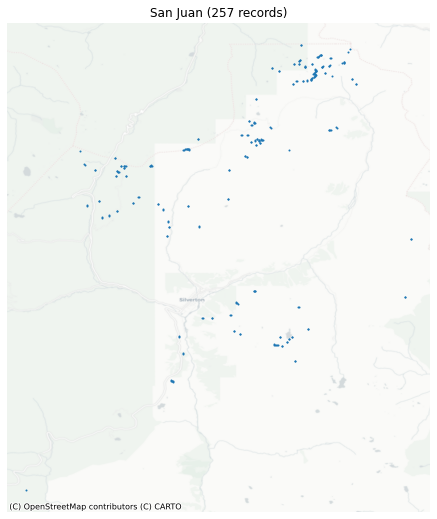

In [14]:
# COUNTY variable
COUNTY = 'San Juan'

# map
ax = hist_gdf[hist_gdf.COUNTY == COUNTY].plot(figsize=(9,9), markersize=1)

# title (including count)
ax.set_title(COUNTY + ' (' + str(hist_gdf[hist_gdf.COUNTY == COUNTY].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [15]:
# create a function
def COUNTY_by(COUNTY='San Juan'):
    
    # map
    ax = hist_gdf[hist_gdf.COUNTY == COUNTY].plot(figsize=(9,9), markersize=2)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(COUNTY + ' (' + str(hist_gdf[hist_gdf.COUNTY == COUNTY].shape[0]) + ' records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

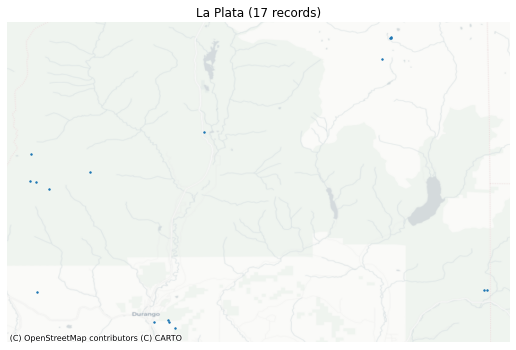

In [16]:
# call the function for a different County
COUNTY_by(COUNTY = 'La Plata')

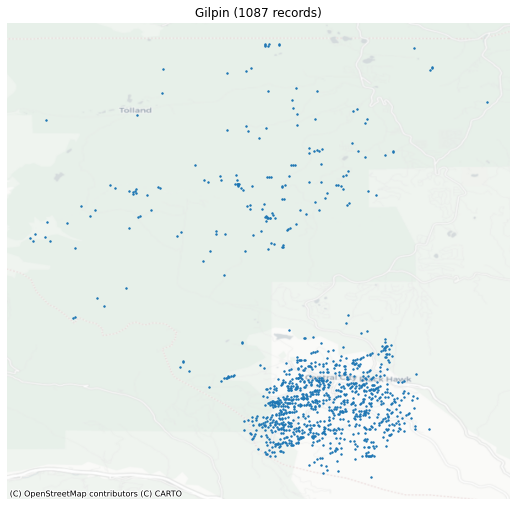

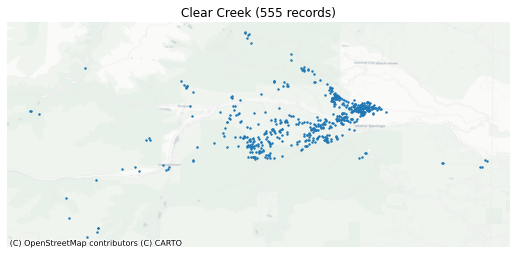

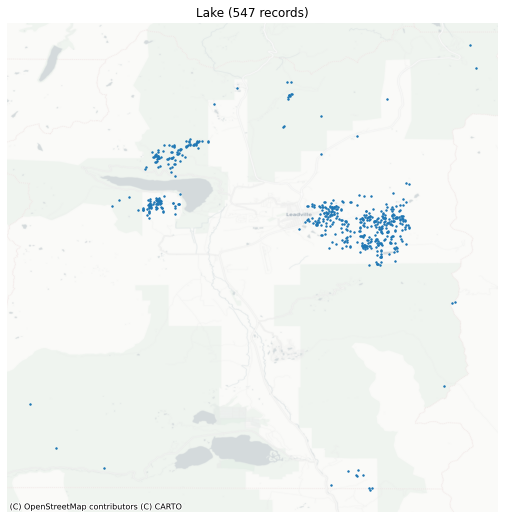

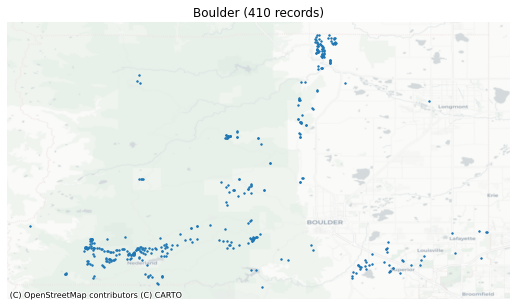

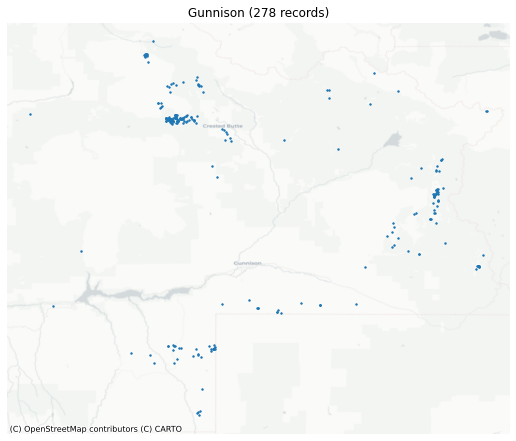

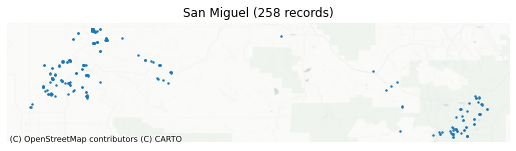

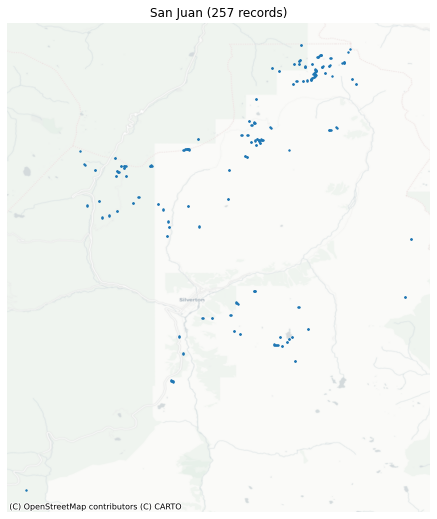

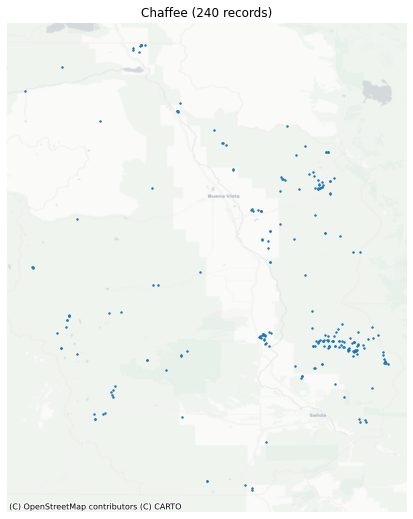

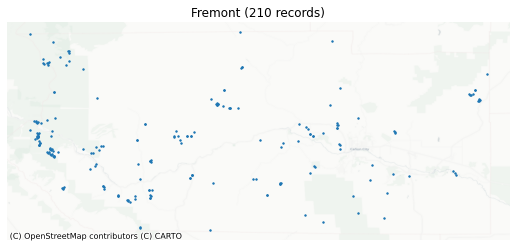

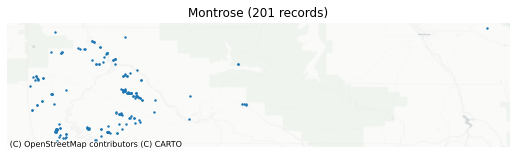

In [17]:
# loop through top 10 counties
for COUNTY in top_10_counties:
    COUNTY_by(COUNTY = COUNTY)

Having these top counties isolated will be very useful when I go to focus on a particular region for my analysis later on (once I bring in employment data and am looking at specfiic areas). I also think mine type could be of interest when I start considering how the economies of certain areas have transitioned.